## Alumno: Gerardo de Miguel González

## Distribuciones

*1.- Generar una muestra de tamaño N = 10000 correspondiente a la altura de personas adultas, asumiendo que su densidad de probabilidad es una función normal/gaussiana con μ= 1.78m y σ= 0.1 m.*

**nota**: mis comentarios están marcados con *::GMG::*

### Muestra

In [1]:
#::GMG::Fijamos una semilla (seed) para que nuestras medidas sean reproducibles
set.seed(3000)
#::GMG::Parámetros de la distribución (pdf) normal de la variable aleatoria altura (m)
mu <- 1.78 # m
sigma <- 0.1 # m
#::GMG::Generamos una muestra aleatoria (random sample) de tamaño 10000 de la variable
#       aleatoria altura con una distribución (pdf) normal con parámetros mu y sigma
#
muestra <- rnorm(n = 10000,mean = mu,sd = sigma)

**::GMG::** La interpretación es que tenemos una realización (valores) que representa(n) el resultado de 10000 experimentos en los que se han hecho 10000 medidas de individuos sacados (elegidos) de la población de forma aleatoria con reemplazo. Cada medida de altura es la realización (se ha sacado) de una variable aleatoria con pdf N(1.78,0.1)

https://en.wikipedia.org/wiki/Sample_(statistics)

### Densidad de frecuencia y probabilidad

*Dibuja la densidad de frecuencia y la densidad de probabilidad por separado.*

**::GMG::** Sabemos de la teoría que existe una relación entre el histograma de frecuencias relativas de la muestra (sample) con el área de cada bin puesto de manera que todos los bins suman área 1 (histograma de densidad de frecuencias relativas) y la función de densidad de probabilidad (pdf).

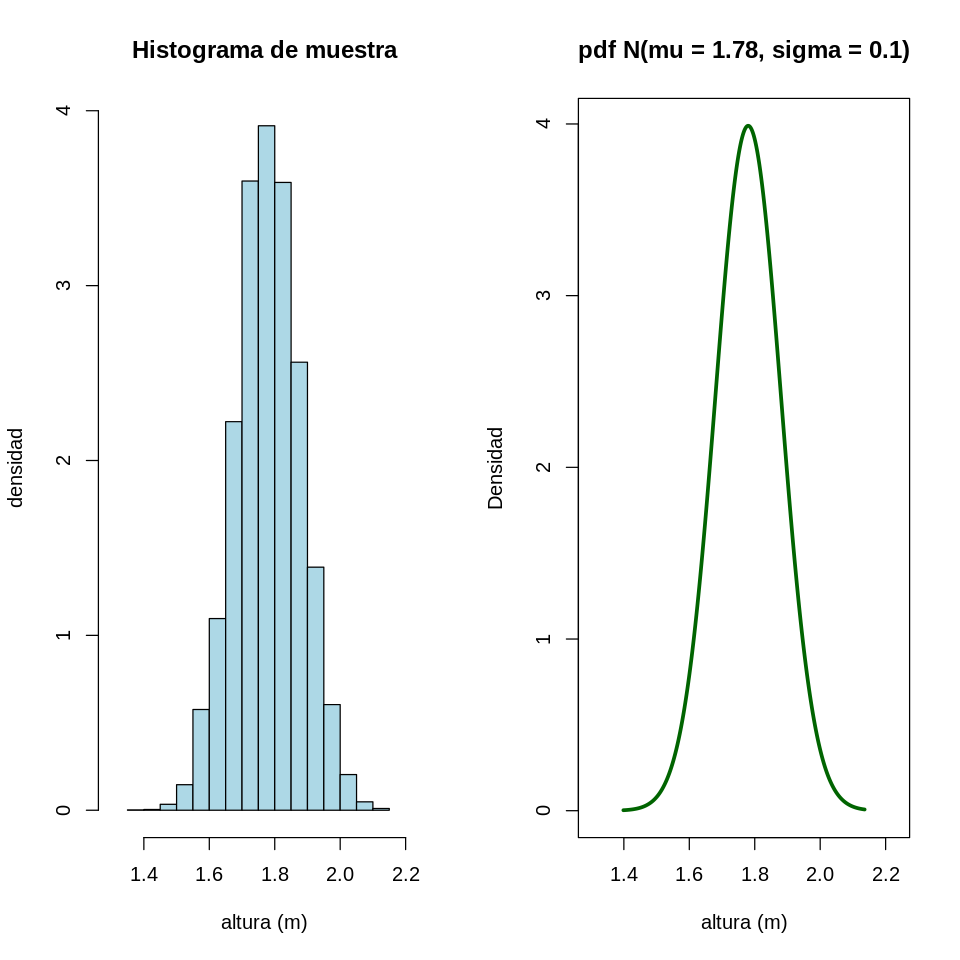

In [2]:
#::GMG::Ponemos una matriz de 1x2 para poner las gráficas emparejadas horizontalmente
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(1,2))
#::GMG::Graficamos el histograma de densidad de probailidad de la muestra
# https://www.statmethods.net/graphs/density.html
h <- hist(x = muestra,
     freq = FALSE, 
     breaks = 'Sturges',
     main = 'Histograma de muestra',
     col="lightblue",
     xlab='altura (m)', ylab='densidad',
     xlim=c(min(muestra) - 0.1, max(muestra) + 0.1))

#::GMG::Y la comparamos con la función densidad de probabilidad de la población
#       sobre una secuencia con el mismo dominio que la muestra generada
xseq <- seq(min(muestra),max(muestra),length=10001)
densities<-dnorm(xseq, mu,sigma)

#::GMG::Graficamos la distribución normal
plot(xseq, 
     densities, 
     col="darkgreen",
     xlab="altura (m)", ylab="Densidad", 
     type="l",lwd=3, 
     main="pdf N(mu = 1.78, sigma = 0.1)",
     xlim=c(min(muestra) - 0.1, max(muestra) + 0.1)
    )

**::GMG::**: vemos que el histograma de densidad de probabilidad se "aproxima" bien a la pdf de la población para el tamaño de la muestra de 10000 (habiendo elegido también el tamaño correcto del bin con *Sturges*, que a veces da problemas a la hora de ver la "forma" de la distribución a la que se tiende ...)

### Estadísticos vs parámetros

*Compara μ y σ con la media muestral y la varianza muestral.*

In [3]:
#::GMG::Para especificar los decimales que se visualizan del estadístico
#specify_decimal <- function(x, k) trimws(format(round(x, k), nsmall=k))
#::nota::mejor round()
paste('Una muestra de tamaño',length(muestra),
      'con media muestral', round(mean(muestra),5),
      'y varianza muestral',round(var(muestra),5),
      'y desviación típica muestral',round(sd(muestra),5))
paste('La media de la población es',mu,
      'y la varianza',sigma**2,
      'y finalmente, la desviación típica',sigma)

#::GMG::Vemos el objeto histograma generado por R 
#       del que hemos dibujado $density al poner Freq = FALSE

[1] "Una muestra de tamaño 10000 con media muestral 1.78022 y varianza muestral 0.00976 y desviación típica muestral 0.09877"

[1] "La media de la población es 1.78 y la varianza 0.01 y finalmente, la desviación típica 0.1"

## Estimadores

*2.- Considerar la distribución de probabilidad anterior y la media muestral para una muestra de tamaño N (TN). Generar un número alto M = 10000 de muestras y estudiar la distribución (μ-TN), para N = 10, 100, 1000, 10000, 100000. Calcular el valor esperado en cada caso (considerando el valor esperado como el promedio a los M = 10000 pseudo-experimentos) y dibujar el resultado en función de N.*

### Generador de muestras de tamaño N

In [4]:
#::GMG::Función para generar M muestras de tamaño N dispuestos en una matriz de MxN
muestras <- function(N = 10, M = 10000, mu = 1.78, sigma = 0.1) {
    return (matrix(data = rnorm(M*N,mu,sigma), 
                   nrow = M, 
                   ncol = N, 
                   byrow = TRUE)
           )
}

### Experimentos

**::GMG::**: lo que hago al calcular mm.N y vm.N es obtener un estadístico a partir de cada muestra (`mean`, `var`, `median`) para diferentes tamaños de N. De la teoría sabemos que esos estadísticos son *variables aleatorias* y se pueden utilizar como *estimadores* de los parámetros de la pdf de la población, en este caso N($\mu, \sigma$), de la cual han sido extraídos. 

Lo que se pide es ver cuál es la *distribución muestral* de esos estimadores para los diferentes tamaños de la muestra e intentar estimar los parámetros de esa distribución muestral. Usamos un histograma de densidad y añadimos la curva de densidad para cada distrbución muestral de *estimador*, e indicamos la estimación de su varianza y su esperanza (media). 

**::DUDA::** Suponemos ahora que nuestra población son las 10000 muestras (?)

In [5]:
#::GMG::Hago reproducibles los experimentos
set.seed(1)

In [6]:
#::GMG::Generamos los diferentes "experimentos" 
T.10 = muestras(N = 10)
paste('T.10:= filas:',nrow(T.10), 'columnas:',ncol(T.10))

[1] "T.10:= filas: 10000 columnas: 10"

In [7]:
T.100 = muestras(N = 100)
paste('T.100:= filas:',nrow(T.100), 'columnas:',ncol(T.100))

[1] "T.100:= filas: 10000 columnas: 100"

In [8]:
T.1000 = muestras(N = 1000)
paste('T.1000:= filas:',nrow(T.1000), 'columnas:',ncol(T.1000))

[1] "T.1000:= filas: 10000 columnas: 1000"

In [9]:
T.10000 = muestras(N = 10000)
paste('T.10000:= filas:',nrow(T.10000), 'columnas:',ncol(T.10000))

[1] "T.10000:= filas: 10000 columnas: 10000"

In [10]:
#::GMG::Viendo lo que ha tardado el anterior ... corto aquí :)
#T.100000 = muestras(100000)

### Media

In [11]:
mm.10 <- apply(X = T.10,MARGIN = 1,FUN = mean)
length(mm.10)

[1] 10000

In [12]:
paste('Tenemos un conjunto de 10000 muestras de tamaño 10 con media de media muestral',
      round(mean(mm.10),3), ', varianza de media muestral',
      round(var(mm.10),3), 'y desviación típica de media muestral',
      round(sd(mm.10),3))

[1] "Tenemos un conjunto de 10000 muestras de tamaño 10 con media de media muestral 1.78 , varianza de media muestral 0.001 y desviación típica de media muestral 0.032"

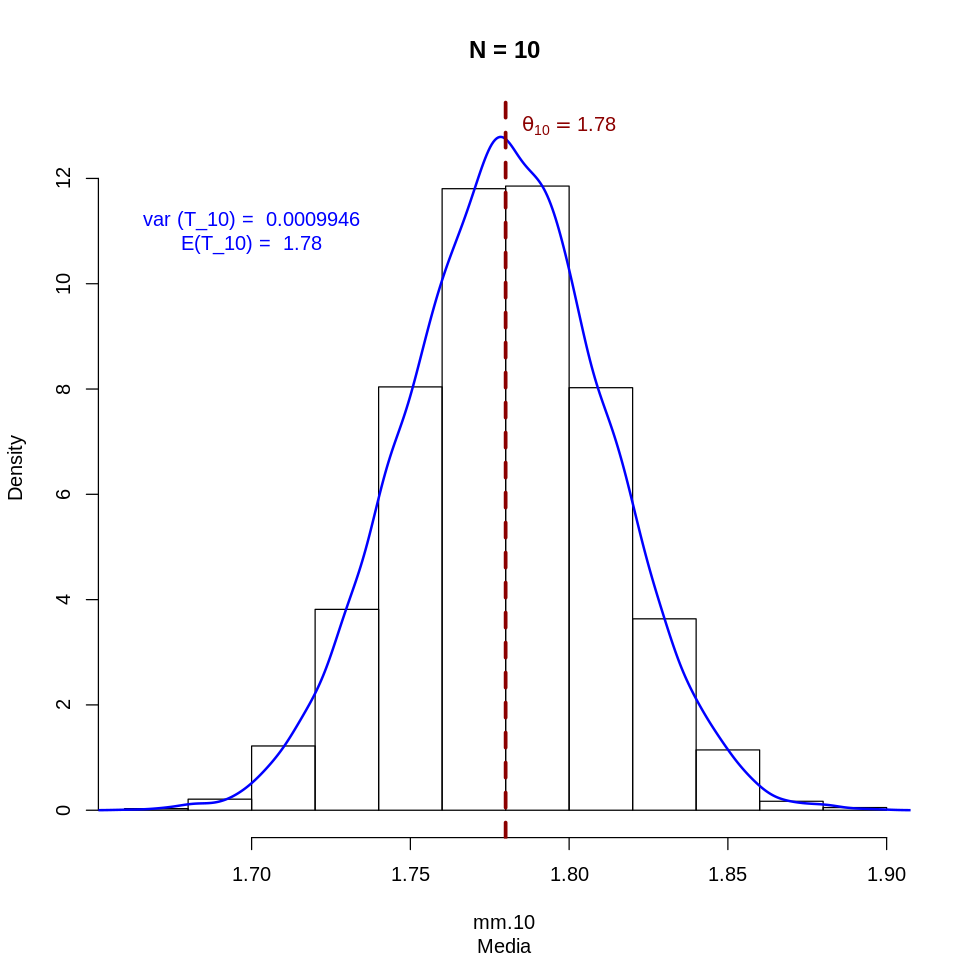

In [26]:
#::GMG::Dibujo su histograma, curva de densidad y estimación de parámetros
hist(mm.10, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,13), xlim = c(min(mm.10), max(mm.10)),
     main = 'N = 10',
     sub = 'Media')
lines(density(mm.10),lwd = 2,col = 'blue')
abline(v = mu, col="darkred", lwd=3, lty=2)
text(1.80,13, expression(italic(theta[10]) == 1.78), col = 'darkred')
text(1.70, 11, 
    paste(' var (T_10) = ', round(var(mm.10),7), 
          '\nE(T_10) = ', round(mean(mm.10),3)),
    col = 'blue'
)

In [17]:
mm.100 <- apply(X = T.100,MARGIN = 1,FUN = mean)
length(mm.100)

[1] 10000

In [21]:
paste('Tenemos un conjunto de 10000 muestras de tamaño 100 con media de media muestral',
      round(mean(mm.100),3), ', varianza de media muestral',
      round(var(mm.100),7), 'y desviación típica de media muestral',
      round(sd(mm.100),5))

[1] "Tenemos un conjunto de 10000 muestras de tamaño 100 con media de media muestral 1.78 , varianza de media muestral 0.0001006 y desviación típica de media muestral 0.01003"

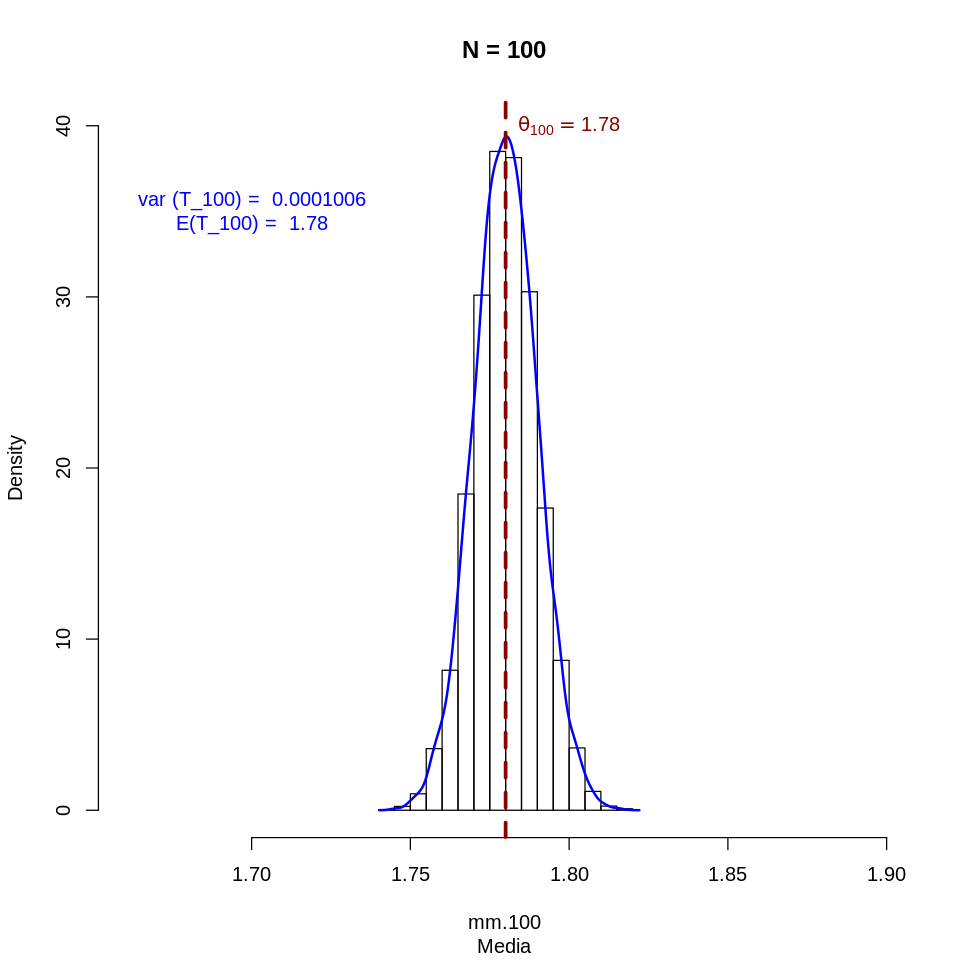

In [23]:
#::GMG::Dibujo su histograma, curva de densidad y estimación de parámetros
hist(mm.100, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,40), xlim = c(min(mm.10), max(mm.10)),
     main = 'N = 100',
     sub = 'Media')
lines(density(mm.100),lwd = 2,col = 'blue')
abline(v = mu, col="darkred", lwd=3, lty=2)
text(1.80,40, expression(italic(theta[100]) == 1.78),col = 'darkred')
text(1.70, 35, 
     paste(' var (T_100) = ', round(var(mm.100),7), 
           '\nE(T_100) = ', round(mean(mm.100),3)),
    col = 'blue'
)

In [24]:
mm.1000 <- apply(X = T.1000,MARGIN = 1,FUN = mean)
length(mm.1000)

[1] 10000

In [25]:
paste('Tenemos un conjunto de 10000 muestras de tamaño 10 con media de media muestral',
      round(mean(mm.1000),3), ', varianza de media muestral',
      round(var(mm.1000),7), 'y desviación típica de media muestral',
      round(sd(mm.1000),5))

[1] "Tenemos un conjunto de 10000 muestras de tamaño 10 con media de media muestral 1.78 , varianza de media muestral 1.01e-05 y desviación típica de media muestral 0.00317"

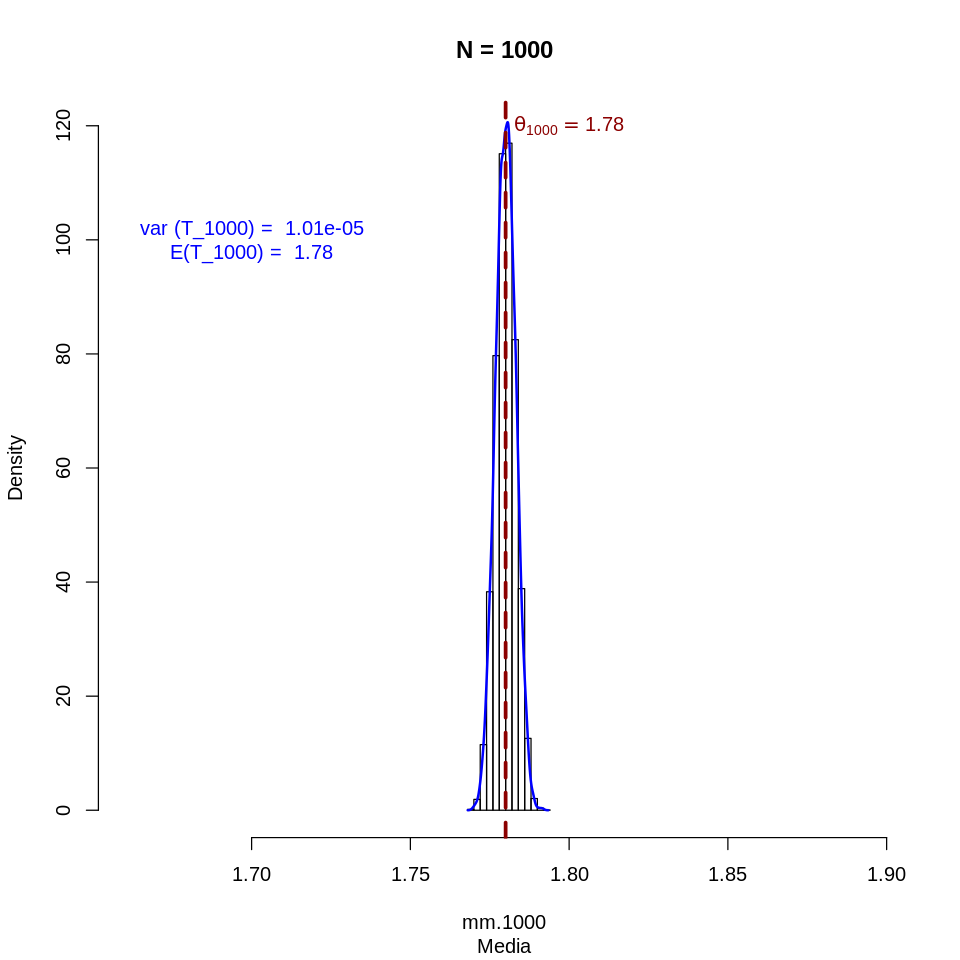

In [28]:
#::GMG::Dibujo su histograma, curva de densidad y estimación de parámetros
hist(mm.1000, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,120), xlim = c(min(mm.10), max(mm.10)),
     main = 'N = 1000',
     sub = 'Media')
lines(density(mm.1000),lwd = 2,col = 'blue')
abline(v = mu, col="darkred", lwd=3, lty=2)
text(1.80,120, expression(italic(theta[1000]) == 1.78), col = 'darkred')
text(1.70, 100, 
     paste(' var (T_1000) = ', round(var(mm.1000),7), 
           '\nE(T_1000) = ', round(mean(mm.1000),3)),
    col = 'blue'
)

In [29]:
mm.10000 <- apply(X = T.10000,MARGIN = 1,FUN = mean)
length(mm.10000)

[1] 10000

In [30]:
paste('Tenemos un conjunto de 10000 muestras de tamaño 10 con media de media muestral',
      round(mean(mm.10000),3), ', varianza de media muestral',
      round(var(mm.10000),7), 'y desviación típica de media muestral',
      round(sd(mm.10000),7))

[1] "Tenemos un conjunto de 10000 muestras de tamaño 10 con media de media muestral 1.78 , varianza de media muestral 1e-06 y desviación típica de media muestral 0.0010014"

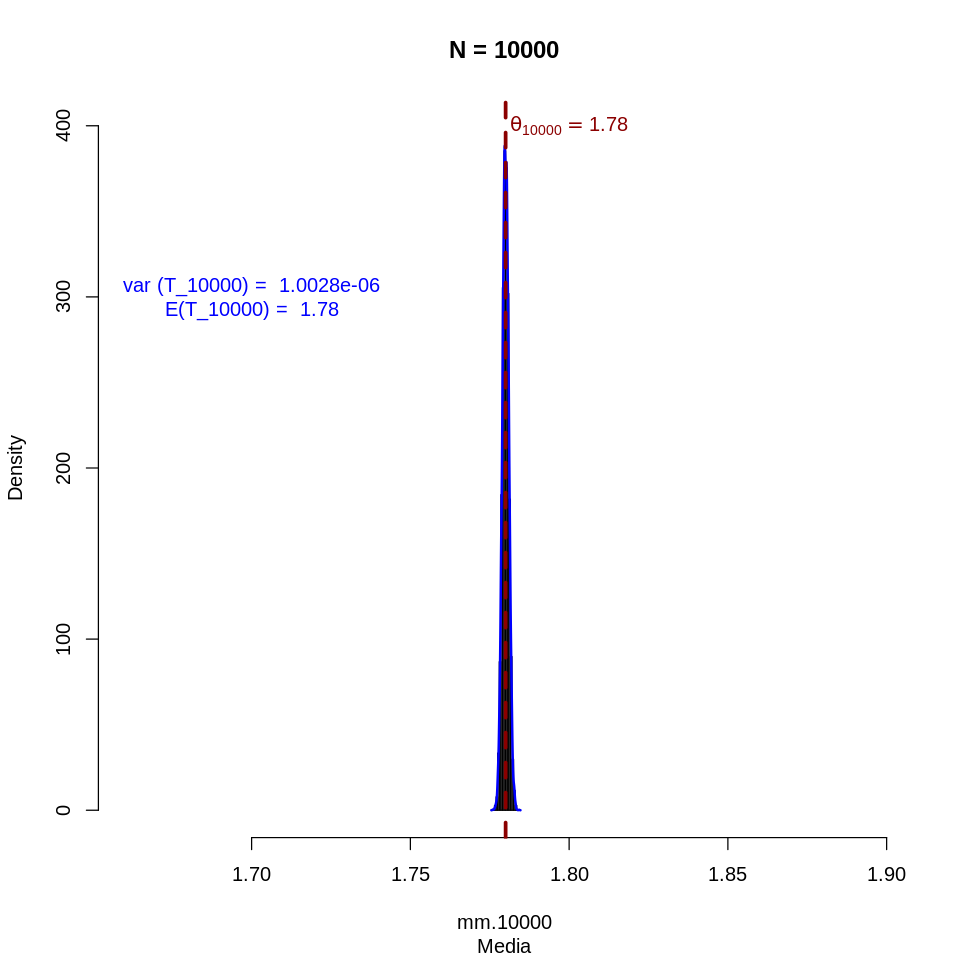

In [31]:
#::GMG::Dibujo su histograma, curva de densidad y estimación de parámetros
hist(mm.10000, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,400), xlim = c(min(mm.10), max(mm.10)),
     main = 'N = 10000',
     sub = 'Media')
lines(density(mm.10000),lwd = 2,col = 'blue')
abline(v = mu, col="darkred", lwd=3, lty=2)
text(1.80,400, expression(italic(theta[10000]) == 1.78), col = 'darkred')
text(1.70, 300, 
     paste(' var (T_10000) = ', round(var(mm.10000),10), 
           '\nE(T_10000) = ', round(mean(mm.10000),5)),
    col = 'blue'
)

**::GMG::**: Aquí se comprueba claramente la **consistencia** del estimador `mm.N`:

\begin{equation*}
\lim_{N\to\infty} E(mm.N) = \theta
\end{equation*}

\begin{equation*}
\lim_{N\to\infty} Var(mm.N) = 0
\end{equation*}

### Varianza (fórmula insesgada)

3.- *Repetir el mismo procedimiento usando la varianza (considerando de nuevo las las M = 10000 pseudo-muestras).*

In [32]:
#::GMG::Calculo los estimadores
vm.unbiased.10 <- apply(X = T.10,MARGIN = 1,FUN = var)
vm.unbiased.100 <- apply(X = T.100,MARGIN = 1,FUN = var)
vm.unbiased.1000 <- apply(X = T.1000,MARGIN = 1,FUN = var)
vm.unbiased.10000 <- apply(X = T.10000,MARGIN = 1,FUN = var)

In [33]:
paste('Tenemos un conjunto de', length(vm.unbiased.10), 
      'muestras de tamaño 10 con media de varianza muestral',
      round(mean(vm.unbiased.10),3), ', varianza de varianza muestral',
      round(var(vm.unbiased.10),7), 'y desviación típica de varianza muestral',
      round(sd(vm.unbiased.10),7))

[1] "Tenemos un conjunto de 10000 muestras de tamaño 10 con media de media muestral 0.01 , varianza de media muestral 2.26e-05 y desviación típica de media muestral 0.0047507"

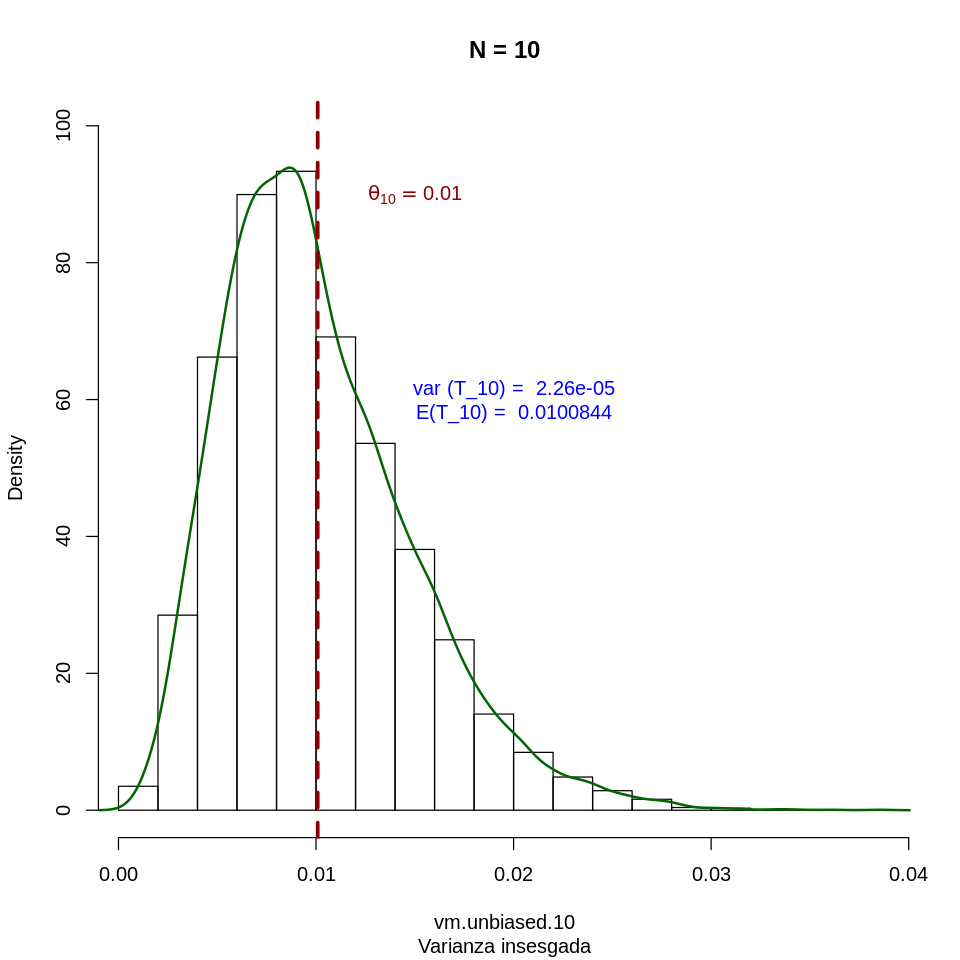

In [51]:
#::GMG::Dibujo su histograma, curva de densidad y estimación de parámetros
hist(vm.unbiased.10, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,100), xlim = c(min(vm.unbiased.10), max(vm.unbiased.10)),
     main = 'N = 10',
     sub = 'Varianza insesgada')
lines(density(vm.unbiased.10),lwd = 2,col = 'darkgreen')
abline(v = mean(vm.unbiased.10), col="darkred", lwd=3, lty=2)
text(0.015,90, expression(italic(theta[10]) == 0.01), col = 'darkred')
text(0.02, 60, 
    paste(' var (T_10) = ', round(var(vm.unbiased.10),7), 
          '\nE(T_10) = ', round(mean(vm.unbiased.10),7)),
    col = 'blue'
)

In [45]:
paste('Tenemos un conjunto de', length(vm.unbiased.100), 
      'muestras de tamaño 100 con media de varianza muestral',
      round(mean(vm.unbiased.100),3), ', varianza de varianza muestral',
      round(var(vm.unbiased.100),7), 'y desviación típica de varianza muestral',
      round(sd(vm.unbiased.100),7))

[1] "Tenemos un conjunto de 10000 muestras de tamaño 100 con media de varianza muestral 0.01 , varianza de varianza muestral 2e-06 y desviación típica de varianza muestral 0.0014111"

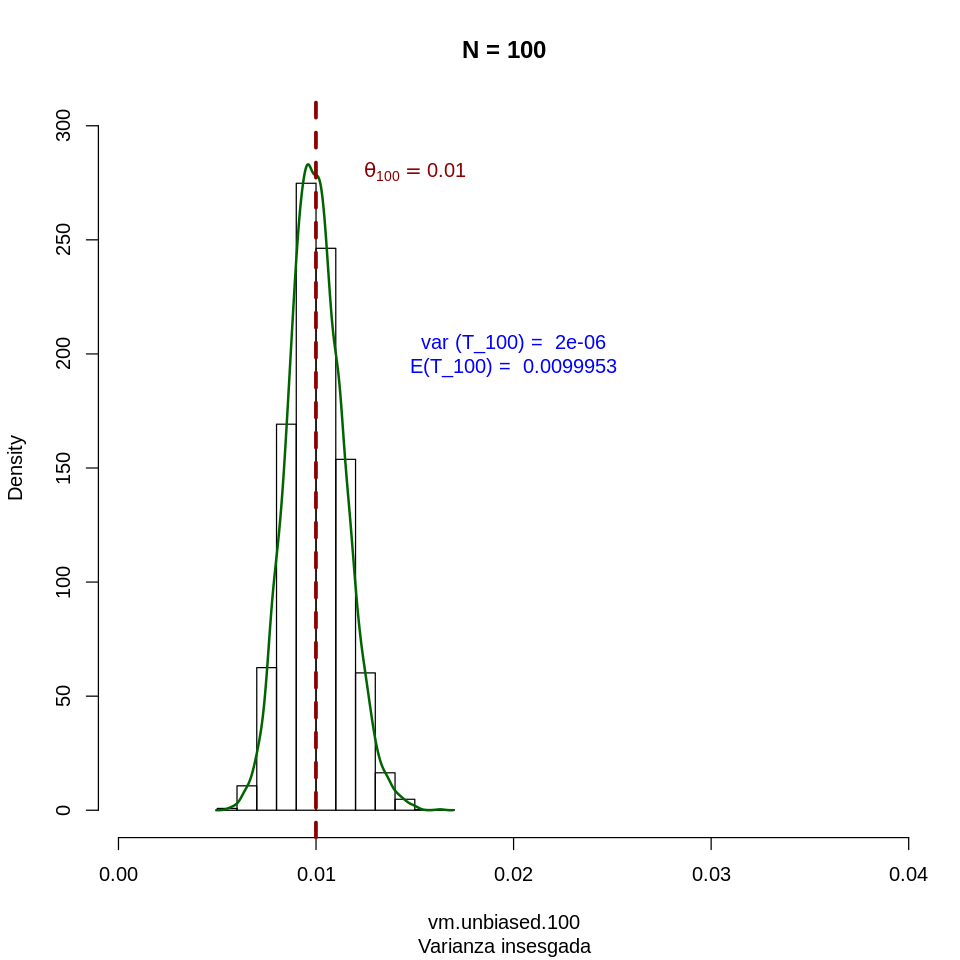

In [52]:
#::GMG::Dibujo su histograma, curva de densidad y estimación de parámetros
hist(vm.unbiased.100, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,300), xlim = c(min(vm.unbiased.10), max(vm.unbiased.10)),
     main = 'N = 100',
     sub = 'Varianza insesgada')
lines(density(vm.unbiased.100),lwd = 2,col = 'darkgreen')
abline(v = mean(vm.unbiased.100), col="darkred", lwd=3, lty=2)
text(0.015,280, expression(italic(theta[100]) == 0.01), col = 'darkred')
text(0.02, 200, 
    paste(' var (T_100) = ', round(var(vm.unbiased.100),7), 
          '\nE(T_100) = ', round(mean(vm.unbiased.100),7)),
    col = 'blue'
)

In [53]:
paste('Tenemos un conjunto de', length(vm.unbiased.1000), 
      'muestras de tamaño 1000 con media de varianza muestral',
      round(mean(vm.unbiased.1000),3), ', varianza de varianza muestral',
      round(var(vm.unbiased.1000),7), 'y desviación típica de varianza muestral',
      round(sd(vm.unbiased.1000),7))

[1] "Tenemos un conjunto de 10000 muestras de tamaño 1000 con media de varianza muestral 0.01 , varianza de varianza muestral 2e-07 y desviación típica de varianza muestral 0.0004474"

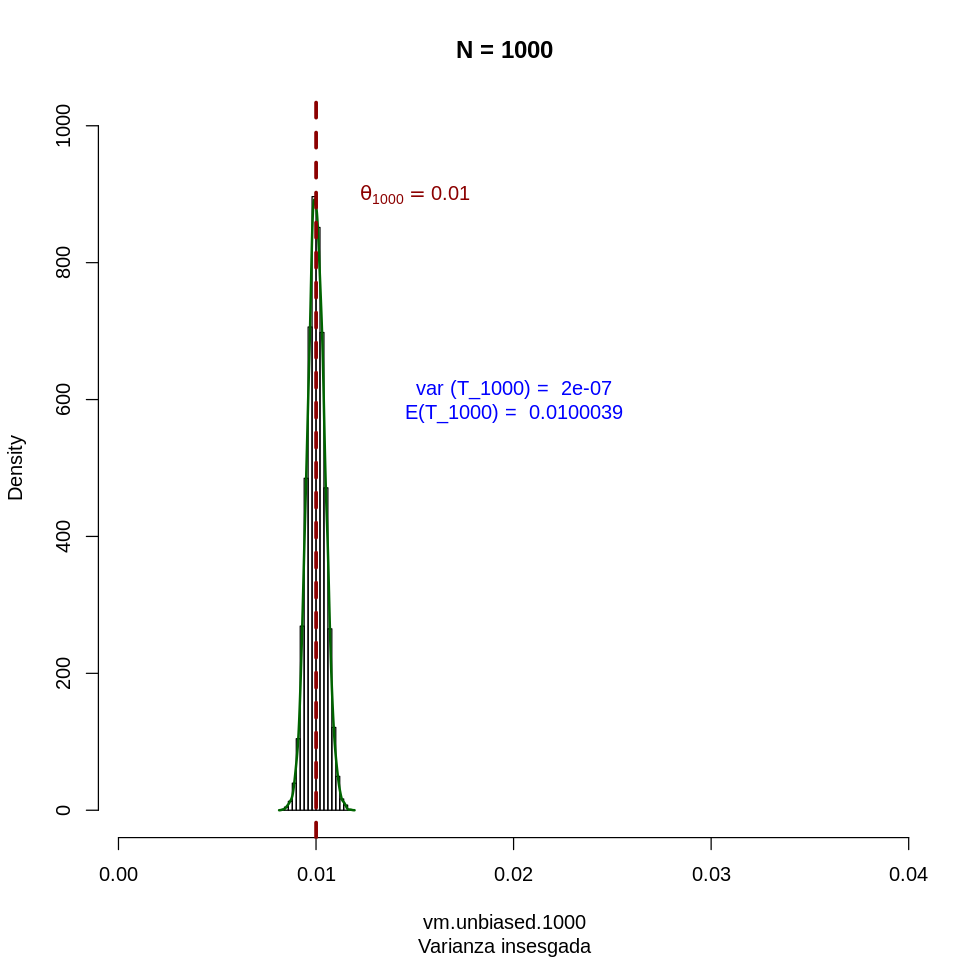

In [58]:
#::GMG::Dibujo su histograma, curva de densidad y estimación de parámetros
hist(vm.unbiased.1000, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,1000), xlim = c(min(vm.unbiased.10), max(vm.unbiased.10)),
     main = 'N = 1000',
     sub = 'Varianza insesgada')
lines(density(vm.unbiased.1000),lwd = 2,col = 'darkgreen')
abline(v = mean(vm.unbiased.1000), col="darkred", lwd=3, lty=2)
text(0.015,900, expression(italic(theta[1000]) == 0.01), col = 'darkred')
text(0.02, 600, 
    paste(' var (T_1000) = ', round(var(vm.unbiased.1000),7), 
          '\nE(T_1000) = ', round(mean(vm.unbiased.1000),7)),
    col = 'blue'
)

In [60]:
paste('Tenemos un conjunto de', length(vm.unbiased.10000), 
      'muestras de tamaño 10000 con media de varianza muestral',
      round(mean(vm.unbiased.10000),3), ', varianza de varianza muestral',
      round(var(vm.unbiased.10000),9), 'y desviación típica de varianza muestral',
      round(sd(vm.unbiased.10000),7))

[1] "Tenemos un conjunto de 10000 muestras de tamaño 10000 con media de varianza muestral 0.01 , varianza de varianza muestral 2e-08 y desviación típica de varianza muestral 0.0001418"

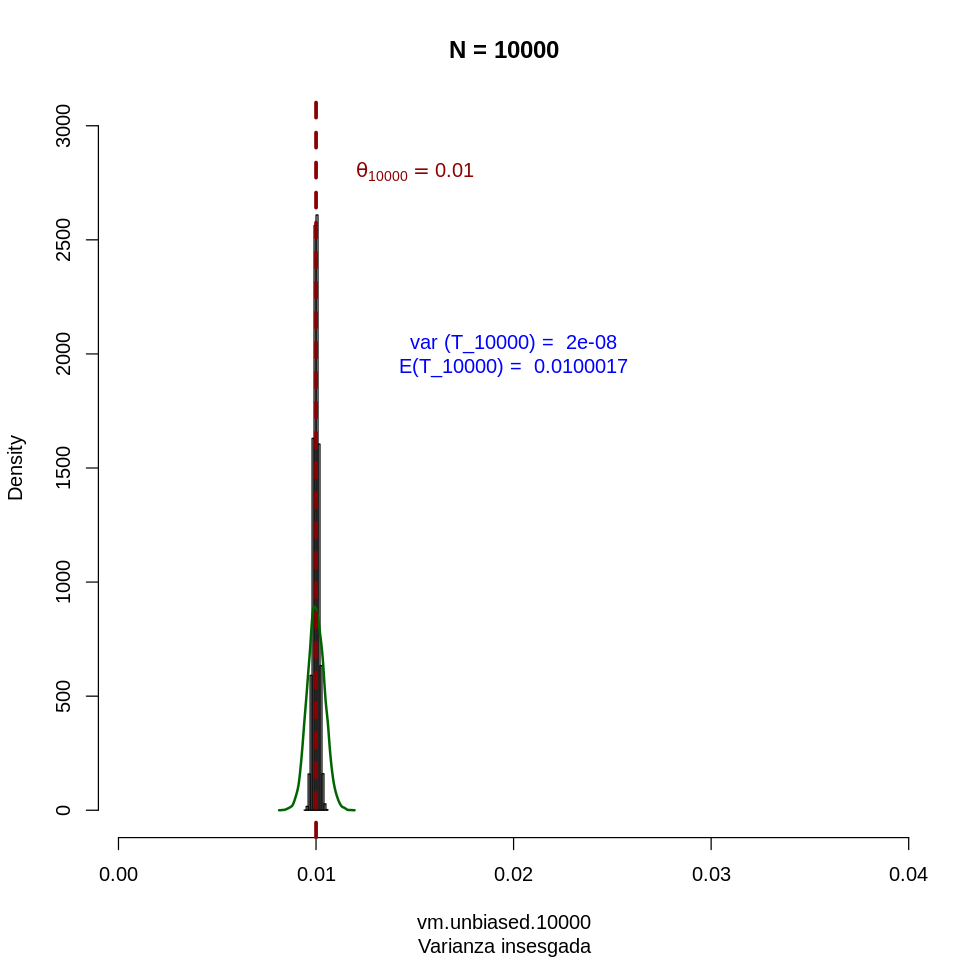

In [65]:
#::GMG::Dibujo su histograma, curva de densidad y estimación de parámetros
hist(vm.unbiased.10000, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,3000), xlim = c(min(vm.unbiased.10), max(vm.unbiased.10)),
     main = 'N = 10000',
     sub = 'Varianza insesgada')
lines(density(vm.unbiased.1000),lwd = 2,col = 'darkgreen')
abline(v = mean(vm.unbiased.10000), col="darkred", lwd=3, lty=2)
text(0.015,2800, expression(italic(theta[10000]) == 0.01), col = 'darkred')
text(0.02, 2000, 
    paste(' var (T_10000) = ', round(var(vm.unbiased.10000),9), 
          '\nE(T_10000) = ', round(mean(vm.unbiased.10000),7)),
    col = 'blue'
)

### Varianza (fórmula sesgada)

4.- *Considerar la distribución de probabilidad anterior y la fórmula sesgada de la varianza. Generar un número alto de M = 10000 de muestras y estudiar la distribución (σ-SN), para N = 10, 100, 1000, 10000, 100000. Calcular el valor esperado en cada caso (usando de nuevo la media muestral) y dibujar el resultado en función de N. ¿Se trata de un estimador consistente?*

In [66]:
#::GMG::Función del estimador sesgado a partir del estimador insesgado var() de R
biased.var = function(x){var(x)*(length(x)-1)/length(x)}

In [67]:
vm.biased.10 <- apply(X = T.10,MARGIN = 1,FUN = biased.var)
vm.biased.100 <- apply(X = T.100,MARGIN = 1,FUN = biased.var)
vm.biased.1000 <- apply(X = T.1000,MARGIN = 1,FUN = biased.var)
vm.biased.10000 <- apply(X = T.10000,MARGIN = 1,FUN = biased.var)

In [68]:
paste('Tenemos un conjunto de', length(vm.biased.10), 
      'muestras de tamaño 10 con media de varianza muestral',
      round(mean(vm.biased.10),3), ', varianza de varianza muestral',
      round(var(vm.biased.10),7), 'y desviación típica de varianza muestral',
      round(sd(vm.biased.10),7))

[1] "Tenemos un conjunto de 10000 muestras de tamaño 10 con media de varianza muestral 0.009 , varianza de varianza muestral 1.83e-05 y desviación típica de varianza muestral 0.0042756"

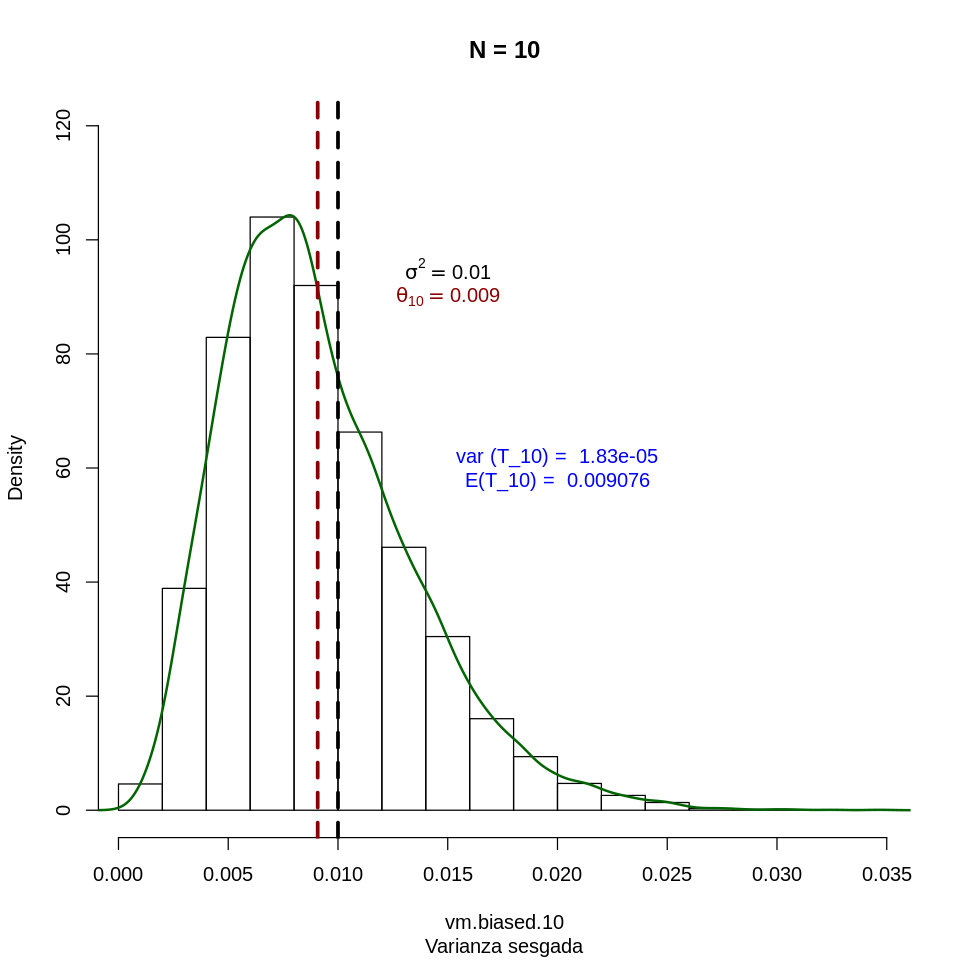

In [76]:
#::GMG::Dibujo su histograma, curva de densidad y estimación de parámetros
hist(vm.biased.10, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,120), xlim = c(min(vm.biased.10), max(vm.biased.10)),
     main = 'N = 10',
     sub = 'Varianza sesgada')
lines(density(vm.biased.10),lwd = 2,col = 'darkgreen')
abline(v = mean(vm.biased.10), col="darkred", lwd=3, lty=2)
abline(v = sigma^2, col="black", lwd=3, lty=2)
text(0.015,90, expression(italic(theta[10]) == 0.009), col = 'darkred')
text(0.015,95, expression(italic(sigma^2) == 0.01), col = 'black')
text(0.02, 60, 
    paste(' var (T_10) = ', round(var(vm.biased.10),7), 
          '\nE(T_10) = ', round(mean(vm.biased.10),7)),
    col = 'blue'
)

In [ ]:
#::GMG::PEDIENTES ...

### Mediana

5.- *Repetir 2) utilizando la mediana en lugar de la media. ¿Cuál de los dos estimadores es más eficiente?*

In [78]:
#::GMG::Generamos los diferentes "experimentos" y calculamos la mediana
#       muestral de cada una de las muestras de tamaño N
# Caso 1: 1000 muestras de tamaño 10
mediana.10 <- apply(X = T.10,MARGIN = 1,FUN = median)
length(mediana.10)
str(mediana.10)

[1] 10000

 num [1:10000] 1.81 1.83 1.78 1.77 1.79 ...


In [79]:
paste('Tenemos un conjunto de 10000 muestras de tamaño 10 con media de mediana muestral',
      round(mean(mediana.10),3), ', varianza de mediana muestral',
      round(var(mediana.10),3), 'y desviación típica de mediana muestral',
      round(sd(mediana.10),3))

[1] "Tenemos un conjunto de 10000 muestras de tamaño 10 con media de mediana muestral 1.78 , varianza de mediana muestral 0.001 y desviación típica de mediana muestral 0.037"

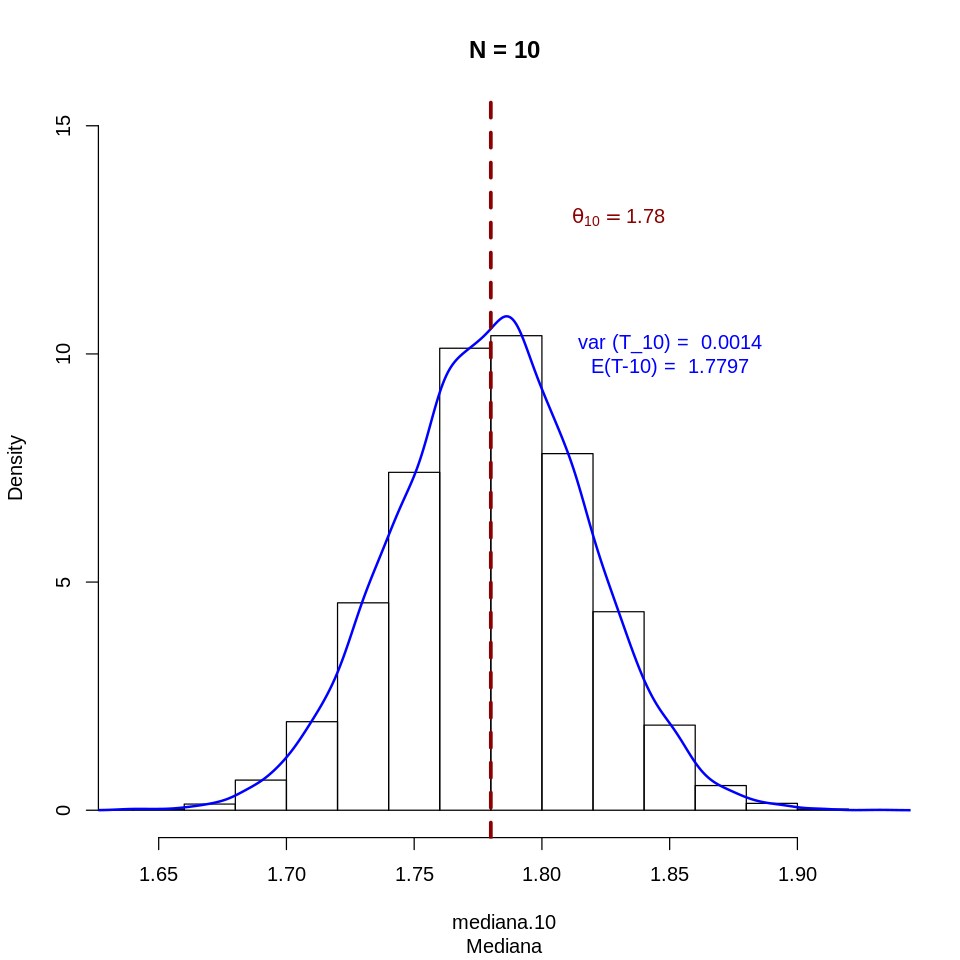

In [83]:
hist(mediana.10, 
     freq=FALSE,
     breaks = 'Sturges',
     ylim = c(0,15), xlim = c(min(mediana.10), max(mediana.10)),
     main = 'N = 10',
     sub = 'Mediana')
lines(density(mediana.10),lwd = 2,col = 'blue')
#::GMG::La mediana de una muestra de 10000 sacada de una distribución normal
#       es igual a la media, al ser una distribución simétrica
abline(v = mu, col="darkred", lwd=3, lty=2)
text(1.83,13, expression(italic(theta[10]) == 1.78), col = 'darkred')
text(1.85, 10, 
     paste(' var (T_10) = ', round(var(mediana.10),4), 
           '\nE(T-10) = ', round(mean(mediana.10),4)),
     col = 'blue'
)

In [ ]:
#::GMG:: PENDIENTES ...